In [19]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *
from graph import *
import importlib

In [20]:
df = load_data()

# Evaluate the best number of Cluster

In [21]:
matrix = tf_idf(df)

In [22]:
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.06539
Clusters = 3 ,Silhouette Score = 0.0973
Clusters = 4 ,Silhouette Score = 0.12028
Clusters = 5 ,Silhouette Score = 0.13913
Clusters = 6 ,Silhouette Score = 0.14752
Clusters = 7 ,Silhouette Score = 0.14255
Clusters = 8 ,Silhouette Score = 0.11244
Clusters = 9 ,Silhouette Score = 0.09948
Clusters = 10 ,Silhouette Score = 0.07915
Clusters = 11 ,Silhouette Score = 0.07459
Clusters = 12 ,Silhouette Score = 0.04671
Clusters = 13 ,Silhouette Score = 0.06508
Clusters = 14 ,Silhouette Score = 0.07042


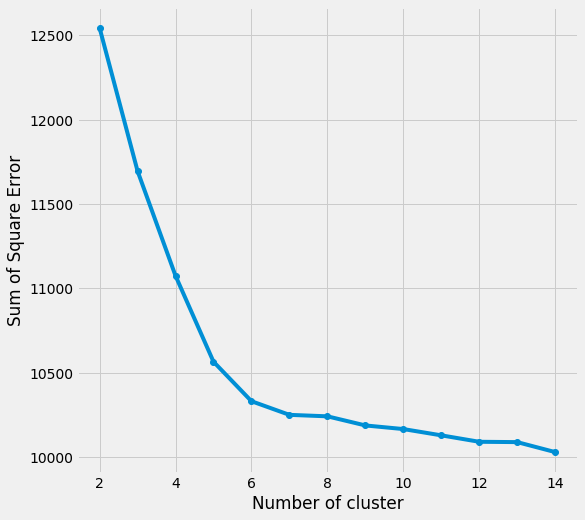

In [23]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [24]:
clusters = kmeans(matrix = matrix, cluster_num = 6, score = sscore[6] )

In [25]:
def silhouette_graph(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

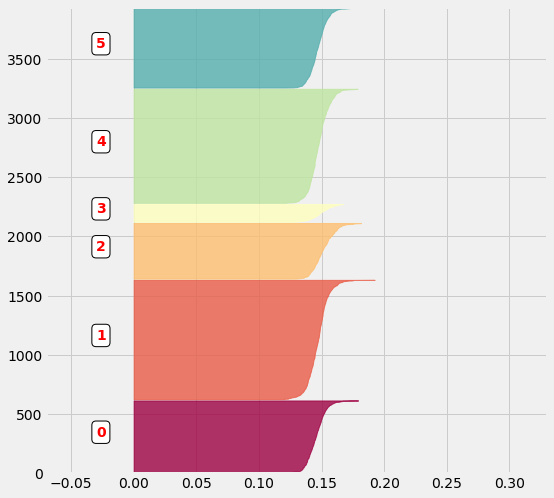

In [26]:
# Plot Silhouette graph
sample_silhouette_values = silhouette_samples(matrix, clusters)
silhouette_graph(6, [-0.07, 0.33], len(matrix), sample_silhouette_values, clusters)

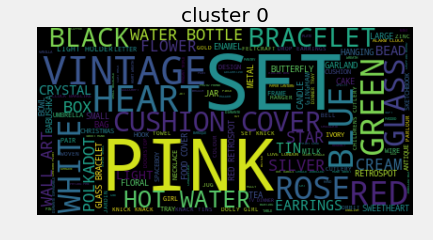

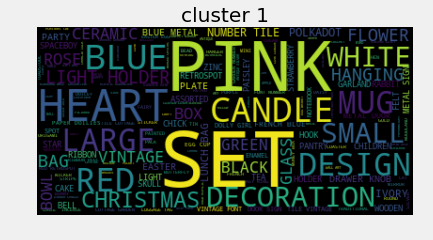

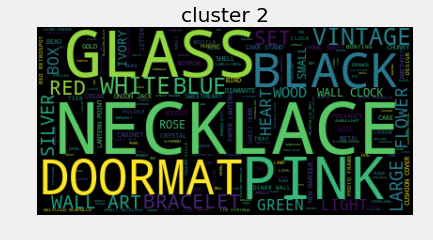

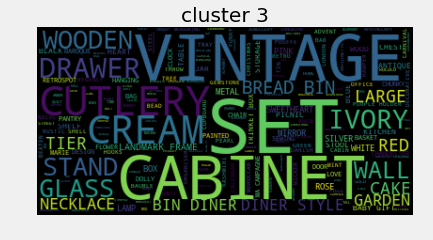

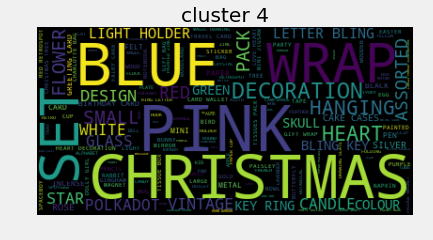

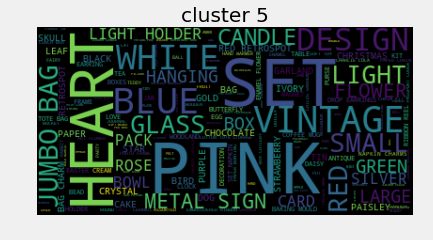

In [27]:
# Plot word cloud
d_list = df['Description'].unique().tolist()
prod_cluster = defaultdict(list)
for i in range(len(clusters)):
    cluster_num = clusters[i]
    prod_cluster[cluster_num].append(d_list[i])
for i in range(len(prod_cluster)):
    s = " "
    words = s.join(prod_cluster[i])
    wordcloud = WordCloud().generate(text = words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('cluster {}'.format(i))
    plt.show()

In [28]:
df = tf_idf_write_back(df,clusters)

In [29]:
tf_idf_rfm = rfm(df,1)
tf_idf_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6
0,17850,34,372,5391.21,1878.04,594.12,1262.80,607.75,0.00,1048.50
1,13047,9,56,3232.59,956.90,494.78,826.45,140.80,277.18,536.48
2,12583,15,2,6705.38,2082.10,1532.50,245.25,230.25,1448.88,1166.40
3,13748,5,95,948.25,48.20,147.00,29.40,93.65,52.68,577.32
4,15100,3,333,876.00,0.00,0.00,0.00,876.00,0.00,0.00
5,15291,14,25,4623.30,784.60,978.46,1972.95,179.05,207.48,500.76
6,14688,21,7,5579.10,964.60,1140.47,428.85,25.00,900.10,2120.08
7,17809,12,16,5411.91,1425.49,1232.89,1843.15,0.00,127.38,783.00
8,15311,91,0,60632.75,5879.91,18800.67,7703.65,755.00,4780.97,22712.55
9,16098,7,87,2005.63,404.00,93.30,382.50,528.20,45.67,551.96


In [30]:
matrix = rfm_matrix(tf_idf_rfm)
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.71417
Clusters = 3 ,Silhouette Score = 0.63272
Clusters = 4 ,Silhouette Score = 0.53676
Clusters = 5 ,Silhouette Score = 0.55156
Clusters = 6 ,Silhouette Score = 0.53867
Clusters = 7 ,Silhouette Score = 0.51412
Clusters = 8 ,Silhouette Score = 0.52526
Clusters = 9 ,Silhouette Score = 0.44158
Clusters = 10 ,Silhouette Score = 0.44363
Clusters = 11 ,Silhouette Score = 0.45928
Clusters = 12 ,Silhouette Score = 0.45225
Clusters = 13 ,Silhouette Score = 0.45488
Clusters = 14 ,Silhouette Score = 0.45814


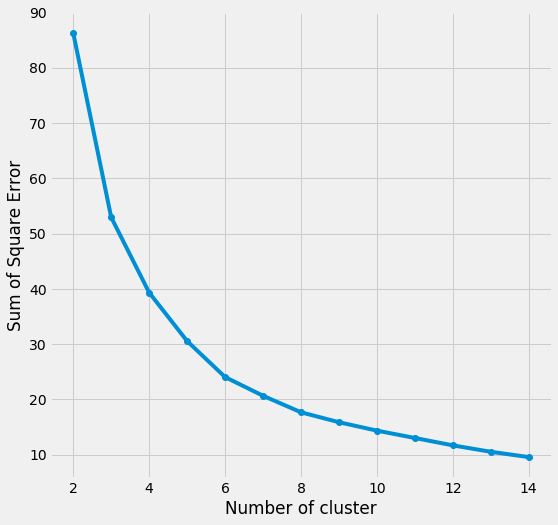

In [31]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [32]:
clusters = kmeans(matrix = matrix, cluster_num = 5, score = sscore[5] )
len(clusters)

4322

In [33]:
tf_idf_rfm = rfm_write_back(tf_idf_rfm,clusters) 
tf_idf_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,Group
0,17850,34,372,5391.21,1878.04,594.12,1262.80,607.75,0.00,1048.50,1
1,13047,9,56,3232.59,956.90,494.78,826.45,140.80,277.18,536.48,0
2,12583,15,2,6705.38,2082.10,1532.50,245.25,230.25,1448.88,1166.40,3
3,13748,5,95,948.25,48.20,147.00,29.40,93.65,52.68,577.32,0
4,15100,3,333,876.00,0.00,0.00,0.00,876.00,0.00,0.00,1
5,15291,14,25,4623.30,784.60,978.46,1972.95,179.05,207.48,500.76,3
6,14688,21,7,5579.10,964.60,1140.47,428.85,25.00,900.10,2120.08,3
7,17809,12,16,5411.91,1425.49,1232.89,1843.15,0.00,127.38,783.00,3
8,15311,91,0,60632.75,5879.91,18800.67,7703.65,755.00,4780.97,22712.55,4
9,16098,7,87,2005.63,404.00,93.30,382.50,528.20,45.67,551.96,0


In [34]:
tf_idf_rfm.groupby('Group', as_index = False)['CustomerID'].count()
tf_idf_rfm.rename(columns={'Group': 'Cluster'}, inplace=True)

In [36]:
n_attributes = len(tf_idf_rfm.columns) - 5
customer_clustering = df_for_chart(tf_idf_rfm, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_3 std,cate_4,cate_4 mean,cate_4 std,cate_5,cate_5 mean,cate_5 std,cate_6,cate_6 mean,cate_6 std
Cluster,,,,,,,,,,,,,,,,,,,,,
1,196724.20,261.490,498,1.0,224.430000,17.129555,67.666627,143.473264,21.852827,86.324900,...,168.625655,9.347249,36.924297,102.272392,10.183745,40.228695,62.362960,22.704568,89.689518,239.161635
0,1072981.80,621.830,1087,2.0,309.050000,18.360339,181.235603,356.578711,25.698009,253.666017,...,255.569942,5.690427,56.170423,145.752818,12.929519,127.627774,192.542432,23.236788,229.371214,423.016080
3,4802425.68,1134.955,2102,4.0,297.880000,18.578046,424.451394,905.734824,24.271896,554.538416,...,862.457342,5.805576,132.639615,431.434653,11.671559,266.659358,456.182257,24.289949,554.950885,1144.353302
4,1662404.25,61304.795,18,51.5,1575.261774,17.533314,16193.030556,11862.424686,20.953298,19351.584444,...,33008.925329,7.269384,6713.697222,9042.715904,9.019116,8329.676111,7789.075567,26.089838,24095.476667,16163.461170
2,389424.72,348.150,617,1.0,234.385000,14.375767,90.733857,167.449785,21.905939,138.261167,...,186.605089,18.013019,113.690681,1606.218800,11.227143,70.861053,120.762599,18.442160,116.399238,185.775447


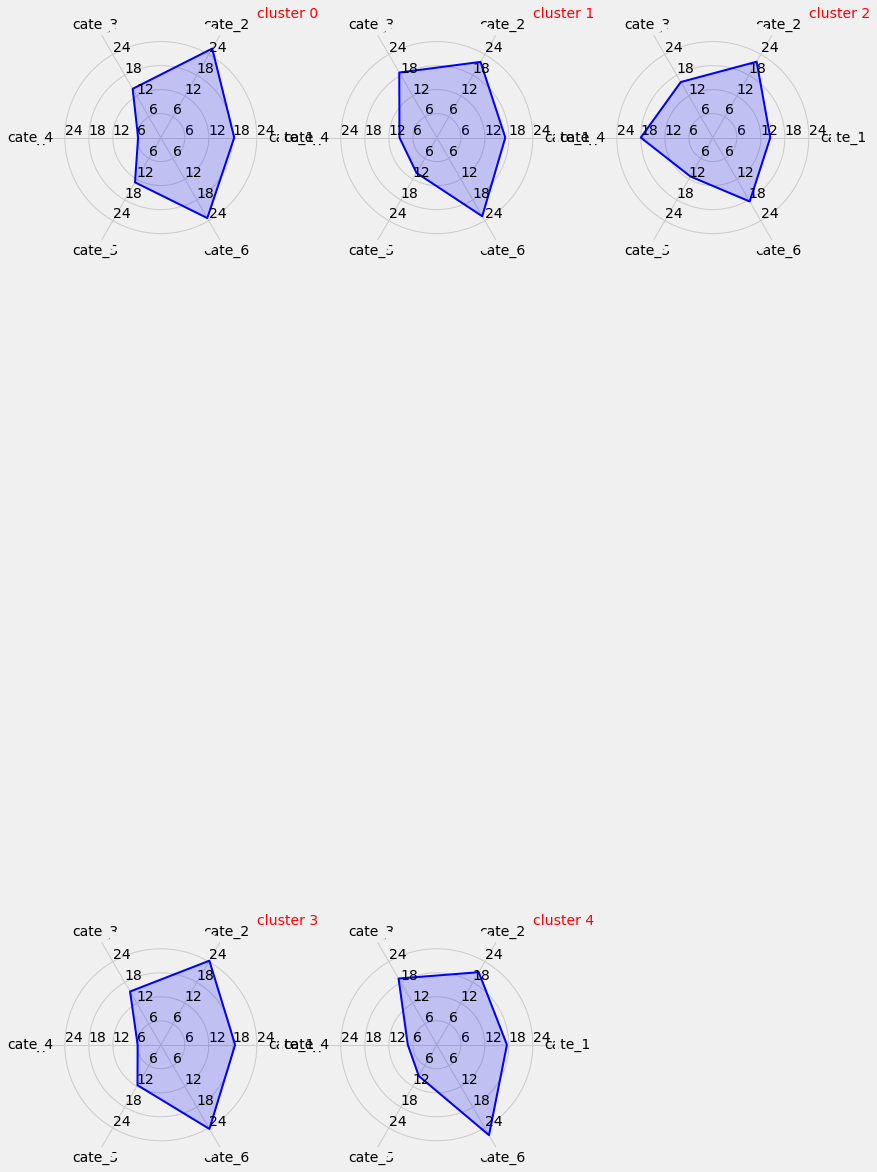

In [37]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

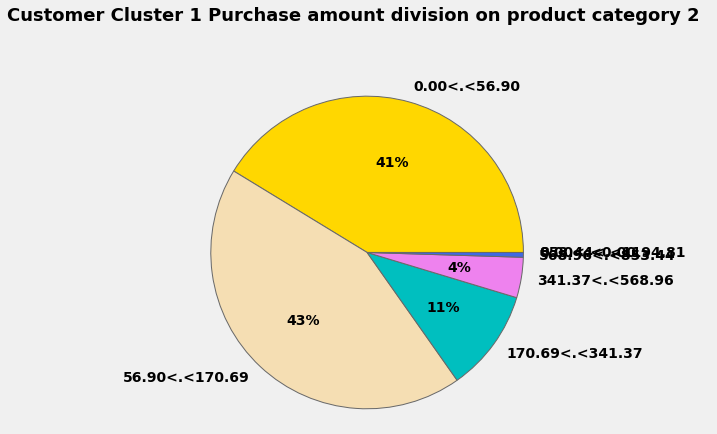

In [38]:
pie_chart(tf_idf_rfm, 1, 2)